#### Solar, Wind, Load Trend In a Year Range

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
import pooch

plt.rcParams['figure.figsize'] = (12, 6)

<h2> Loading Data</h2>

In [2]:
doi = "doi:10.5281/zenodo.5739406"
fname = "wind_po_hrly.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:cf059b73d6831282c5580776ac07309a",
)
file_path
data=pd.read_csv(file_path)

data_energy = pd.DataFrame(data,columns = ["date.time"])


locations = data.columns.values[1:]
turbine_power = [2,2,2,2,6,6,6,6]


Num_turbine = []
for i in range(len(locations)):
    Num_turbine.append(10000 / (turbine_power[i] * data[locations[i]].mean()))

for i in range(len(locations)):
    data_energy[locations[i]] = data[locations[i]] * Num_turbine[i] * turbine_power[i]
    
    
data_energy["Site1234"] = 0.25 * (data_energy[locations[0]] + data_energy[locations[1]] 
                           + data_energy[locations[2]] + data_energy[locations[3]])

data_energy["Site1256"] = 0.25 * (data_energy[locations[0]] + data_energy[locations[1]] 
                           + data_energy[locations[4]] + data_energy[locations[5]])

data_energy["Site5678"] = 0.25 * (data_energy[locations[4]] + data_energy[locations[5]] 
                           + data_energy[locations[6]] + data_energy[locations[7]])

data_energy["All"] = 0.125 * (data_energy[locations[0]] + data_energy[locations[1]] 
                       + data_energy[locations[2]] + data_energy[locations[3]] 
                       + data_energy[locations[4]] + data_energy[locations[5]] 
                       + data_energy[locations[6]] + data_energy[locations[7]])
data_energy['time'] = pd.to_datetime(data_energy['date.time'])
df_wind = data_energy.set_index('time')
del df_wind['date.time']
df_wind = df_wind.to_xarray()
df_wind

<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    ny_1_onshore   (time) float64 2.449e+04 2.37e+04 ... 8.66e+03 8.547e+03
    ny_2_onshore   (time) float64 1.503e+04 1.492e+04 ... 1.03e+04 1.236e+04
    newe_onshore   (time) float64 1.525e+04 1.489e+04 ... 6.387e+03 8.497e+03
    mw_onshore     (time) float64 1.413e+04 1.506e+04 ... 1.798e+04 1.924e+04
    newe_offshore  (time) float64 1.383e+04 1.397e+04 ... 5.725e+03 8.537e+03
    ny_offshore    (time) float64 1.064e+04 1.069e+04 ... 1.021e+04 1.365e+04
    rfce_offshore  (time) float64 7.549e+03 7.621e+03 ... 1.609e+04 1.672e+04
    srvc_offshore  (time) float64 3.931e+03 4.422e+03 ... 1.062e+04 9.84e+03
    Site1234       (time) float64 1.723e+04 1.714e+04 ... 1.083e+04 1.216e+04
    Site1256       (time) float64 1.6e+04 1.582e+04 ... 8.722e+03 1.077e+04
    Site5678       (time) float64 8.986e+03 9.176e+03 ... 1.066e+04 1.219e+04
    All            (time) float64 1.311e+04 1.316e+04 ... 1.075e+04 1.217e+04

In [3]:
doi = "doi:10.5281/zenodo.5750726"
fname = "solar_po.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:b7acc6026f08ff062e03aa21625cc974",
)
file_path
data_solar=pd.read_csv(file_path)
data_solar

data_solar['time'] = pd.to_datetime(data_solar['datatime'])
df_solar = data_solar.set_index('time')
del df_solar['datatime']
df_solar = df_solar.to_xarray()
df_solar

<xarray.Dataset>
Dimensions:          (time: 8760)
Coordinates:
  * time             (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    electrfied_load  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.324 0.0 0.0 0.0

In [4]:
doi = "doi:10.5281/zenodo.5750734"
fname = "elec_load.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:c5bd92f180b57e8629b0ca3891d25812",
)
file_path
data_elec=pd.read_csv(file_path)

data_elec['time'] = pd.to_datetime(data_elec['datatime'])
df_elec = data_elec.set_index('time')
del df_elec['datatime']
df_elec = df_elec.to_xarray()
df_elec

<xarray.Dataset>
Dimensions:          (time: 8760)
Coordinates:
  * time             (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    current_load     (time) float64 1.973e+04 1.893e+04 ... 1.973e+04 1.969e+04
    electrfied_load  (time) float64 3.895e+04 3.698e+04 ... 3.649e+04 3.799e+04

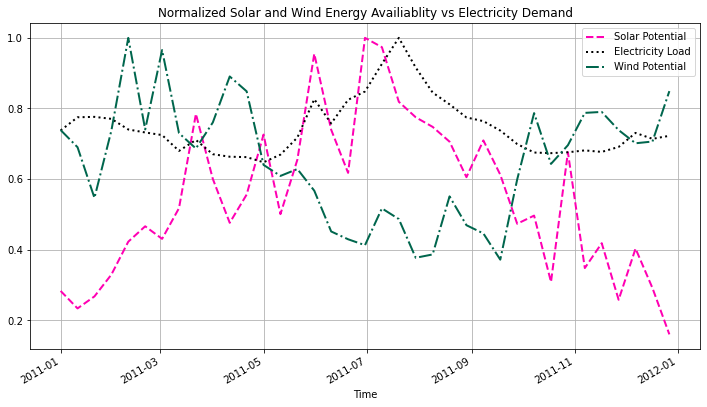

In [17]:
rs_solar = df_solar.resample(time='10D').mean('time')/df_solar.resample(time='10D').mean('time').max()
rs_elec = df_elec.resample(time='10D').mean('time')/df_elec.resample(time='10D').mean('time').max()
#rs_elec = df_elec.rolling(time=12, center = True).mean('time')/df_elec.rolling(time=12, center = True).mean('time').max()
rs_wind = df_wind.All.resample(time='10D').mean('time')/df_wind.resample(time='10D').mean('time').max()

rs_solar.electrfied_load.plot(linestyle='dashed',color=(1, 0, 0.7),linewidth=2,label='Solar Potential')
rs_elec.current_load.plot(color='k',linestyle='dotted',linewidth=2,label='Electricity Load')
rs_wind.All.plot(linestyle='-.', linewidth=2,color=(0, 0.4, 0.3),label='Wind Potential')
plt.grid()
plt.title('Normalized Solar and Wind Energy Availiablity vs Electricity Demand')
plt.xlabel("Time")
plt.ylabel("")
plt.legend()